# 台灣銀行牌告匯率爬蟲練習
## 範例1： 練習爬取台幣對其他貨幣匯率資料

In [1]:
import requests
from bs4 import BeautifulSoup
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt

### 進入台灣銀行牌告匯率網頁：https://rate.bot.com.tw/xrt?Lang=zh-TW ，擷取當日台幣對美金的匯率資訊

In [2]:
# 進入台灣銀行牌告匯率網頁，查看當日匯率資料
url = "https://rate.bot.com.tw/xrt?Lang=zh-TW"
resp = requests.get(url)
resp.encoding = 'utf-8'
# print(resp.text)  # 如有需要，列印出網頁原始碼

html = BeautifulSoup(resp.text, "lxml")
rate_table = html.find(name='table', attrs={'title':'牌告匯率'}).find(name='tbody').find_all(name='tr')

# 查詢美金(也就是匯率表的第一個元素)對台幣的匯率
currency = rate_table[0].find(name='div', attrs={'class':'visible-phone print_hide'})
print(currency.get_text().replace(" ", ""))  # 去掉空白

buy_rate = rate_table[0].find(name='td', attrs={'data-table':'本行現金買入'})
sell_rate = rate_table[0].find(name='td', attrs={'data-table':'本行現金賣出'})
print("即時現金買入: %s, 即時現金賣出: %s" % (buy_rate.get_text(), sell_rate.get_text()))


美金(USD)

即時現金買入: 29.66, 即時現金賣出: 30.33


### 作業part 1：請參考上面的範例，試著爬取所有貨幣對台幣的匯率

In [3]:
url = 'https://rate.bot.com.tw/xrt?Lang=zh-TW'
resp = requests.get(url)
resp.encoding = 'utf-8'

html = BeautifulSoup(resp.text, 'lxml')
rate_table = html.find('tbody').find_all('tr')

In [8]:
p.find('div', attrs = {'class':'visible-phone print_hide'}).text

'\r\n                                人民幣 (CNY)\r\n                            '

In [19]:
for p in rate_table:
    print(p.find('div', 
                 attrs = {'class':'visible-phone print_hide'}).text.replace('\r','').replace('\n','').replace(' ',''))
    print("本行現金買入：{};本行現金賣出：{}".format(p.find('td', attrs={'data-table':'本行現金買入'}).string,p.find('td', attrs = {'data-table':'本行現金賣出'}).string))
    print('-----------------------------------------')
    
    
    
    
    
    
    
    

美金(USD)
本行現金買入：29.66;本行現金賣出：30.33
-----------------------------------------
港幣(HKD)
本行現金買入：3.714;本行現金賣出：3.918
-----------------------------------------
英鎊(GBP)
本行現金買入：37.59;本行現金賣出：39.71
-----------------------------------------
澳幣(AUD)
本行現金買入：19.22;本行現金賣出：20
-----------------------------------------
加拿大幣(CAD)
本行現金買入：21.45;本行現金賣出：22.36
-----------------------------------------
新加坡幣(SGD)
本行現金買入：21.04;本行現金賣出：21.95
-----------------------------------------
瑞士法郎(CHF)
本行現金買入：31.33;本行現金賣出：32.53
-----------------------------------------
日圓(JPY)
本行現金買入：0.277;本行現金賣出：0.2898
-----------------------------------------
南非幣(ZAR)
本行現金買入：-;本行現金賣出：-
-----------------------------------------
瑞典幣(SEK)
本行現金買入：2.79;本行現金賣出：3.31
-----------------------------------------
紐元(NZD)
本行現金買入：18.5;本行現金賣出：19.35
-----------------------------------------
泰幣(THB)
本行現金買入：0.828;本行現金賣出：1.018
-----------------------------------------
菲國比索(PHP)
本行現金買入：0.5213;本行現金賣出：0.6543
-----------------------------------------
印尼幣(IDR)
本行現金

## 範例2：爬取一個月的美金對台幣歷史匯率資料，並畫出趨勢圖


美金(USD)

            buy_rate  sell_rate
date                           
2019/08/01    30.770     31.440
2019/08/02    30.975     31.645
2019/08/05    31.215     31.885
2019/08/06    31.090     31.760
2019/08/07    31.065     31.735
2019/08/08    30.955     31.625
2019/08/09    30.950     31.620
2019/08/12    31.000     31.670
2019/08/13    31.100     31.770
2019/08/14    31.000     31.670
2019/08/15    30.965     31.635
2019/08/16    30.960     31.630
2019/08/19    30.940     31.610
2019/08/20    30.995     31.665
2019/08/21    30.960     31.630
2019/08/22    30.975     31.645
2019/08/23    30.975     31.645
2019/08/26    31.010     31.680
2019/08/27    31.000     31.670
2019/08/28    31.015     31.685
2019/08/29    31.025     31.695
2019/08/30    30.990     31.660


<Figure size 720x576 with 0 Axes>

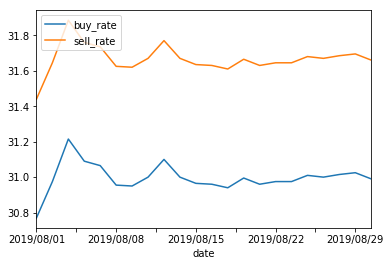

In [83]:
# 先到牌告匯率首頁，爬取所有貨幣的種類
url = "https://rate.bot.com.tw/xrt?Lang=zh-TW"
resp = requests.get(url)
resp.encoding = 'utf-8'
html = BeautifulSoup(resp.text, "lxml")
rate_table = html.find(name='table', attrs={'title':'牌告匯率'}).find(name='tbody').find_all(name='tr')

# 擷取匯率表格，把美金(也就是匯率表的第一個元素)擷取出來，查詢其歷史匯率
currency = rate_table[0].find(name='div', attrs={'class':'visible-phone print_hide'})
print(currency.get_text().replace(" ", ""))  # 貨幣種類

# 針對美金，找到其「歷史匯率」的首頁 
history_link = rate_table[0].find(name='td', attrs={'data-table':'歷史匯率'})
history_rate_link = "https://rate.bot.com.tw" + history_link.a["href"]  # 該貨幣的歷史資料首頁

#
# 到貨幣歷史匯率網頁，選則該貨幣的「歷史區間」，送出查詢後，觀察其網址變化情形，再試著抓取其歷史匯率資料
#
# 用「quote/年-月」去取代網址內容，就可以連到該貨幣的歷史資料
quote_history_url = history_rate_link.replace("history", "quote/2019-08")
resp = requests.get(quote_history_url)
resp.encoding = 'utf-8'
history = BeautifulSoup(resp.text, "lxml")
history_table = history.find(name='table', attrs={'title':'歷史本行營業時間牌告匯率'}).find(name='tbody').find_all(name='tr')

#
# 擷取到歷史匯率資料後，把資料彙整起來並畫出趨勢圖
#
date_history = list()
history_buy = list()
history_sell = list()

for history_rate in history_table:
    # 擷取日期資料
    date_string = history_rate.a.get_text()
    date = datetime.strptime(date_string, '%Y/%M/%d').strftime('%Y/%M/%d')  # 轉換日期格式
    date_history.append(date)  # 日期歷史資料

    history_ex_rate = history_rate.find_all(name='td', attrs={'class':'rate-content-cash text-right print_table-cell'})
    history_buy.append(float(history_ex_rate[0].get_text()))  # 歷史買入匯率
    history_sell.append(float(history_ex_rate[1].get_text()))  # 歷史賣出匯率

# 將匯率資料建成dataframe形式
HistoryExchangeRate = pd.DataFrame({'date': date_history,
                                    'buy_rate':history_buy,
                                    'sell_rate':history_sell})

HistoryExchangeRate = HistoryExchangeRate.set_index('date')  # 指定日期欄位為datafram的index
HistoryExchangeRate = HistoryExchangeRate.sort_index(ascending=True)
print(HistoryExchangeRate)

# 畫出歷史匯率軌跡圖
plt.figure(figsize=(10, 8))
HistoryExchangeRate[['buy_rate','sell_rate']].plot()  # x=['date'], y=[['buy_rate','sell_rate']] 
plt.legend(loc="upper left")
plt.show()

### 作業part 2：爬取每種貨幣對台幣的一個月歷史匯率資料，並畫出趨勢圖

In [32]:
url = "https://rate.bot.com.tw/xrt?Lang=zh-TW"
resp = requests.get(url)
resp.encoding = 'utf-8'
html = BeautifulSoup(resp.text, "lxml")
history_rate_table = html.find('tbody').find_all('tr')

histr_rate_url_list = []
for p in history_rate_table:
        print(p.find('div', attrs = {'class':'visible-phone print_hide'}).text.replace('\r','').
              replace('\n','').replace(' ',''))#幣別
        histr_url = 'https://rate.bot.com.tw'+p.find('td', 
                attrs = {'data-table':'歷史匯率'}).find('a')['href']#歷史網址
        histr_rate_url = histr_url.replace('history','quote/2020-02')
        histr_rate_url_list.append(histr_rate_url)
histr_rate_url_list
        
        
        
        

美金(USD)
港幣(HKD)
英鎊(GBP)
澳幣(AUD)
加拿大幣(CAD)
新加坡幣(SGD)
瑞士法郎(CHF)
日圓(JPY)
南非幣(ZAR)
瑞典幣(SEK)
紐元(NZD)
泰幣(THB)
菲國比索(PHP)
印尼幣(IDR)
歐元(EUR)
韓元(KRW)
越南盾(VND)
馬來幣(MYR)
人民幣(CNY)


['https://rate.bot.com.tw/xrt/quote/2020-02/USD',
 'https://rate.bot.com.tw/xrt/quote/2020-02/HKD',
 'https://rate.bot.com.tw/xrt/quote/2020-02/GBP',
 'https://rate.bot.com.tw/xrt/quote/2020-02/AUD',
 'https://rate.bot.com.tw/xrt/quote/2020-02/CAD',
 'https://rate.bot.com.tw/xrt/quote/2020-02/SGD',
 'https://rate.bot.com.tw/xrt/quote/2020-02/CHF',
 'https://rate.bot.com.tw/xrt/quote/2020-02/JPY',
 'https://rate.bot.com.tw/xrt/quote/2020-02/ZAR',
 'https://rate.bot.com.tw/xrt/quote/2020-02/SEK',
 'https://rate.bot.com.tw/xrt/quote/2020-02/NZD',
 'https://rate.bot.com.tw/xrt/quote/2020-02/THB',
 'https://rate.bot.com.tw/xrt/quote/2020-02/PHP',
 'https://rate.bot.com.tw/xrt/quote/2020-02/IDR',
 'https://rate.bot.com.tw/xrt/quote/2020-02/EUR',
 'https://rate.bot.com.tw/xrt/quote/2020-02/KRW',
 'https://rate.bot.com.tw/xrt/quote/2020-02/VND',
 'https://rate.bot.com.tw/xrt/quote/2020-02/MYR',
 'https://rate.bot.com.tw/xrt/quote/2020-02/CNY']

 美金 (USD)


<Figure size 720x576 with 0 Axes>

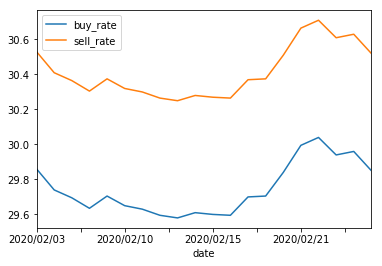

 港幣 (HKD)


<Figure size 720x576 with 0 Axes>

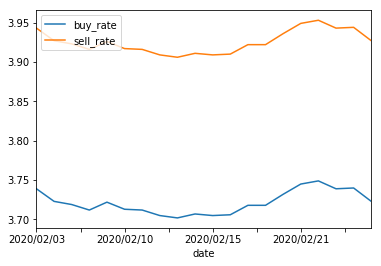

 英鎊 (GBP)


<Figure size 720x576 with 0 Axes>

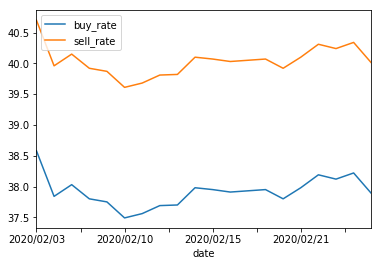

 澳幣 (AUD)


<Figure size 720x576 with 0 Axes>

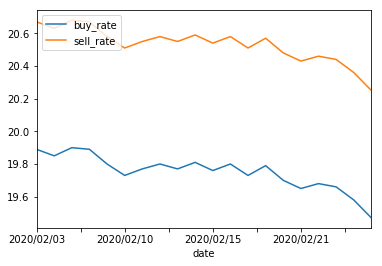

 加拿大幣 (CAD)


<Figure size 720x576 with 0 Axes>

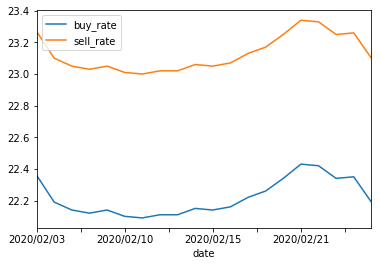

 新加坡幣 (SGD)


<Figure size 720x576 with 0 Axes>

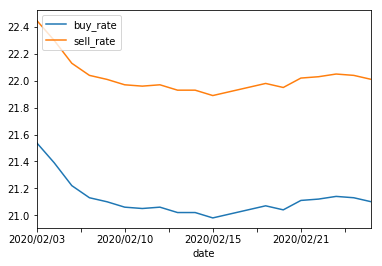

 瑞士法郎 (CHF)


<Figure size 720x576 with 0 Axes>

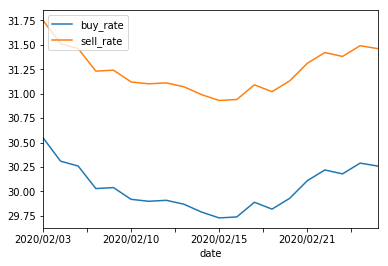

 日圓 (JPY)


<Figure size 720x576 with 0 Axes>

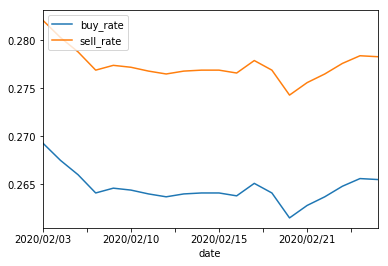

 南非幣 (ZAR)


<Figure size 720x576 with 0 Axes>

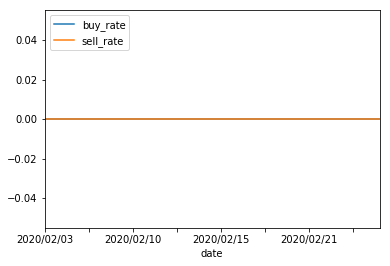

 瑞典幣 (SEK)


<Figure size 720x576 with 0 Axes>

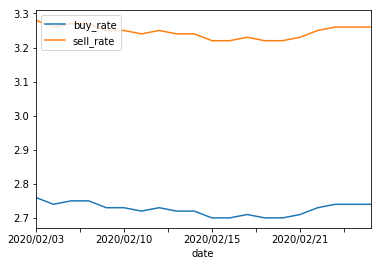

 紐元 (NZD)


<Figure size 720x576 with 0 Axes>

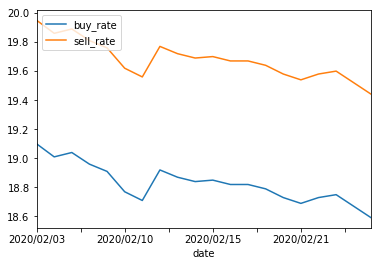

 泰幣 (THB)


<Figure size 720x576 with 0 Axes>

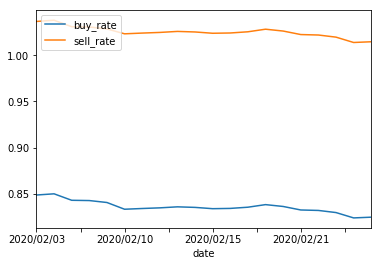

 菲國比索 (PHP)


<Figure size 720x576 with 0 Axes>

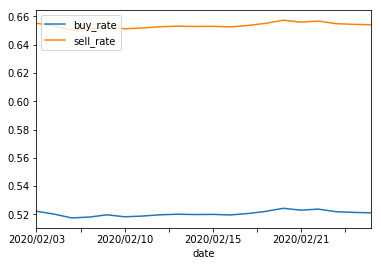

 印尼幣 (IDR)


<Figure size 720x576 with 0 Axes>

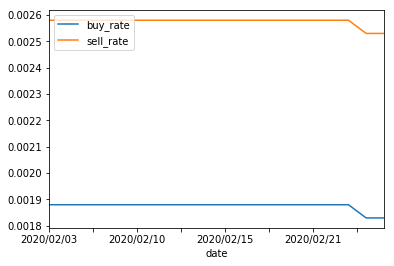

 歐元 (EUR)


<Figure size 720x576 with 0 Axes>

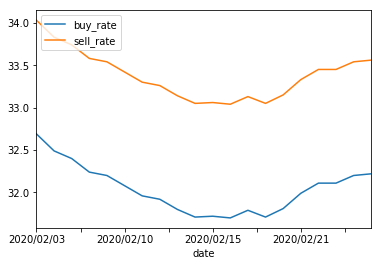

 韓元 (KRW)


<Figure size 720x576 with 0 Axes>

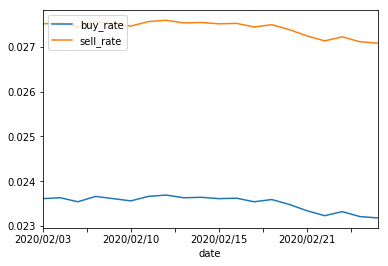

In [ ]:
for x in histr_rate_url_list:
    url = x
    resp = requests.get(url)
    resp.encoding = 'utf-8'
    html = BeautifulSoup(resp.text, 'lxml')
    name = []
    for w in html.find_all('div', class_='value'):
        name.append(w.get_text())
    print(name[1])
    price_in = []
    price_out = []
    date_list = []
    for q in html.find('tbody').find_all('tr'):
        hist_date = q.find('td', class_='text-center').text
        #hist_date = datetime.strptime(hist_date, '%Y/%M/%d').strftime('%Y/%M/%d')
        date_list.append(hist_date)
        n = 0
        for p in q.find_all('td', class_='rate-content-cash text-right print_table-cell'):
            if n == 0:
                p = float(p.text)
                price_in.append(p)
                n = n + 1
            elif n == 1:
                p = float(p.text)
                price_out.append(p)
    HistoryExchangeRate = pd.DataFrame({'date': date_list,
                                    'buy_rate':price_in,
                                    'sell_rate':price_out})
    HistoryExchangeRate = HistoryExchangeRate.set_index('date')  # 指定日期欄位為datafram的index
    HistoryExchangeRate = HistoryExchangeRate.sort_index(ascending=True)
    plt.figure(figsize=(10, 8))
    HistoryExchangeRate[['buy_rate','sell_rate']].plot()  # x=['date'], y=[['buy_rate','sell_rate']] 
    plt.legend(loc="upper left")
    plt.show()